In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
df=pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/CSVData/Soccerresults.csv')
countrydf=pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/CSVData/countrydata.csv')

### Questions to Explore

What are the total number of games per decade?  
Breakup of games by competition (friendly, WC, Euros, etc). 
what % of games are friendlies?  
Who has played/lost/won the most games? what about before and after 1990?  (DONE)  
What is the most frequent matchup?  
Does home team advantage exist? (Done)
Which team has best/worse away record?  
Which team has best/worse neutral record?  
which team has best/worse home record?
How often do matchups take place within own jurisdiction and how often outside? (european vs european team, etc)  
Do european teams win more often against South america or vice versa?  
What is the averag goals scored/conceded/goal difference by decade?

### Preliminary inspection

In [4]:
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


First, lets check the rows X column

In [5]:
df.shape

(43752, 9)

Then, lets check the type of each object, look for null/missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


No null types. Good news.
Date is a string, we will make the date the index and change its format to datetime

In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
df=df.set_index('date')

### Add some more columns to get new useful variables

Define function whowon which will be added as an indicator of the winning team

In [9]:
def whowon(row):
    if row['home_score'] < row['away_score']:
        val = 'A'
    elif row['home_score'] > row['away_score']:
        val = 'H'
    else:
        val = 'D'
    return(val)

In [10]:
df['winner']=df.apply(whowon,axis=1)

In [11]:
df.head(1)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
date,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D


Lets also add the winning country name

In [12]:
def wincountry(row):
    if row['home_score'] < row['away_score']:
        val = row['away_team']
    elif row['home_score'] > row['away_score']:
        val = row['home_team']
    else:
        val = 'D'
    return(val)

def losecountry(row):
    if row['home_score'] < row['away_score']:
        val = row['home_team']
    elif row['home_score'] > row['away_score']:
        val = row['away_team']
    else:
        val = 'D'
    return(val)

In [13]:
df['WinCountry']=df.apply(wincountry,axis=1)
df['LoseCountry']=df.apply(losecountry,axis=1)

In [14]:
df.head(10)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry
date,,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,D,D
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,Scotland
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,England
1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,D,D
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,H,Scotland,England
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,H,Scotland,Wales
1877-03-03,England,Scotland,1,3,Friendly,London,England,False,A,Scotland,England
1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,A,Scotland,Wales
1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,H,Scotland,England


Add 2 additional columns for year and month that the match took place

In [15]:
df['year']=pd.DatetimeIndex(df.index).year
df['month']=pd.DatetimeIndex(df.index).month

In [16]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry,year,month
date,,,,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,D,D,1872,11
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,Scotland,1873,3


Add a column for goal difference

In [17]:
df['diff_score']=abs(df['home_score']-df['away_score'])

In [18]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry,year,month,diff_score
date,,,,,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,D,D,1872,11,0
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,Scotland,1873,3,2


### Use Grouping to summarize matches by Country

Lets calculate the # of games by country. Lets do some grouping first

In [19]:
df.groupby('home_team')['away_team'].count()

home_team
Abkhazia          18
Afghanistan       42
Albania          187
Alderney           7
Algeria          300
                ... 
Yugoslavia       190
Zambia           311
Zanzibar          58
Zimbabwe         200
Åland Islands     27
Name: away_team, Length: 306, dtype: int64

<AxesSubplot:>

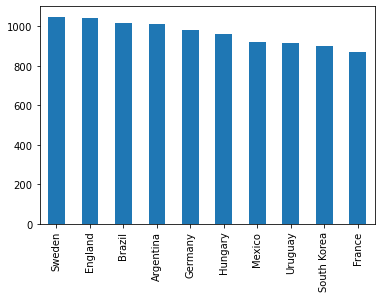

In [20]:
(df.value_counts('home_team')+df.value_counts('away_team')).nlargest(10).plot.bar()

In [21]:
df.groupby('away_team')['home_team'].count()

away_team
Abkhazia          10
Afghanistan       79
Albania          169
Alderney          12
Algeria          228
                ... 
Yugoslavia       291
Zambia           435
Zanzibar         147
Zimbabwe         280
Åland Islands     19
Name: home_team, Length: 303, dtype: int64

One way to calculate total games is to add the 2 series above

In [22]:
df.groupby('home_team')['away_team'].count()+df.groupby('away_team')['home_team'].count()

Abkhazia          28.0
Afghanistan      121.0
Albania          356.0
Alderney          19.0
Algeria          528.0
                 ...  
Yugoslavia       481.0
Zambia           746.0
Zanzibar         205.0
Zimbabwe         480.0
Åland Islands     46.0
Length: 310, dtype: float64

But the home and away team information is lost. Another way is to concat the 2 series.

In [23]:
totalmatches = pd.concat([df.groupby('away_team')['home_team'].count(), df.groupby('home_team')['away_team'].count()],axis=1)

In [24]:
totalmatches

,home_team,away_team
Abkhazia,10.0,18.0
Afghanistan,79.0,42.0
Albania,169.0,187.0
Alderney,12.0,7.0
Algeria,228.0,300.0
...,...,...
Madrid,NaN,1.0
Niue,NaN,2.0
Palau,NaN,2.0
Republic of St. Pauli,NaN,4.0


Lets count the the # of NAs, then lets drop the NAs

In [25]:
totalmatches.isna().sum()

home_team    7
away_team    4
dtype: int64

In [26]:
totalmatches.dropna(inplace=True)

Lets add a third column to get total matches played.

In [27]:
totalmatches['total']=totalmatches['home_team']+totalmatches['away_team']

In [28]:
totalmatches.head(2)

,home_team,away_team,total
Abkhazia,10.0,18.0,28.0
Afghanistan,79.0,42.0,121.0


##### Exhibit A - Who has played the most matches?

Text(0.5, 0.98, '# of matches played')

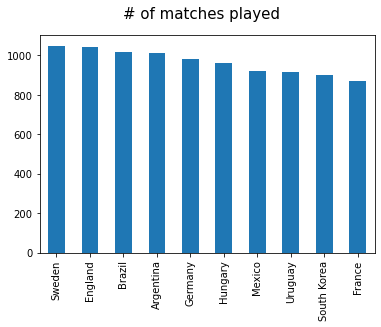

In [29]:
totalmatches.nlargest(10,'total')['total'].plot.bar()
plt.suptitle('# of matches played',fontsize=15)

We can do the same with value count

<AxesSubplot:>

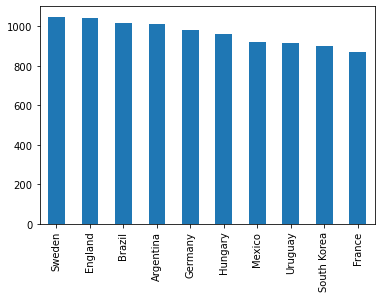

In [62]:
(df.value_counts('home_team')+df.value_counts('away_team')).nlargest(10).plot.bar()

##### Exhibit B - Does home team advantage exist?

In [31]:
df[df['neutral']==False].groupby(['winner'])['home_team'].count()

winner
A     8665
D     7605
H    16618
Name: home_team, dtype: int64

In [32]:

print('Home teams won',str(round(16618/(16618+7605+8665)*100,1))+'% of the time, Drawing',str(round(7605/(16618+7605+8665)*100,1))+'%. This shows a significant home team advantage')

Home teams won 50.5% of the time, Drawing 23.1%. This shows a significant home team advantage


Text(0.5, 0.98, '% of wins by home or away team')

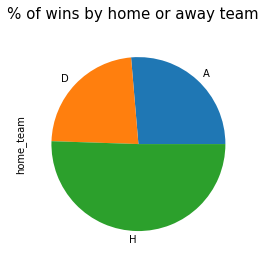

In [33]:
df[df['neutral']==False].groupby(['winner'])['home_team'].count().plot.pie()
plt.suptitle('% of wins by home or away team',fontsize=15)  

##### Exhibit C - Who has won the most number of games?

Text(0.5, 0, 'Country')

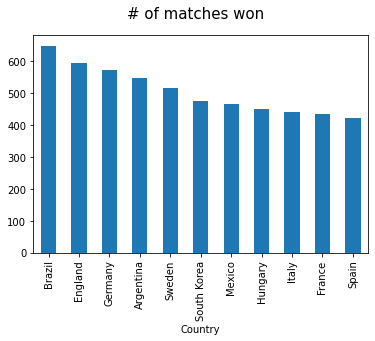

In [34]:
df[df['WinCountry']!='D'].groupby('WinCountry')['home_team'].count().nlargest(11).plot.bar()
plt.suptitle('# of matches won',fontsize=15)
plt.xlabel('Country')

Brazil has won the most number of matches, followed by England and Germany. These are all power houses of soccer, with extremely long match histories so this makes sense.

##### Exhibit D - Which country has hosted the most number of games?

Text(0.5, 0.98, '# of matches hosted')

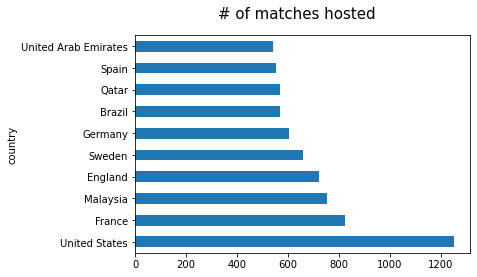

In [35]:
df.groupby('country')['home_team'].count().nlargest(10).plot.barh()
plt.suptitle('# of matches hosted',fontsize=15)

US has hosted the most number of games. Followed by France and Malaysia and England.

Another way to do this is using value_count()

<AxesSubplot:ylabel='country'>

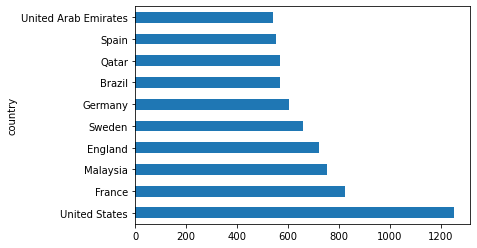

In [36]:
df.value_counts('country').nlargest(10).plot.barh()

Text(0.5, 0.98, '# of matches played')

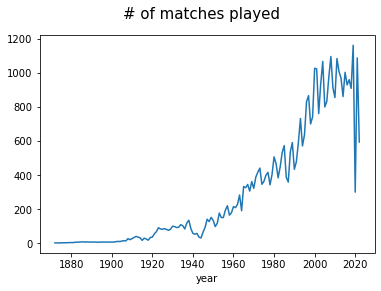

In [37]:
df.groupby(['year'])['home_team'].count().plot()
plt.suptitle('# of matches played',fontsize=15)

There are dips in the world wars and covid

##### Exhibit E - Average and Standard Deviation of goals scored each year (Home, away, and differential)

Text(0.5, 0.98, 'Average goals')

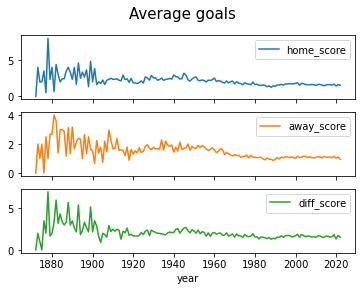

In [38]:
df.groupby('year').mean().plot(y=['home_score','away_score','diff_score'],subplots=True)
plt.suptitle('Average goals',fontsize=15)

Average goals score per year has been trending down, so has the goal difference

Text(0.5, 0.98, 'Std of Goals')

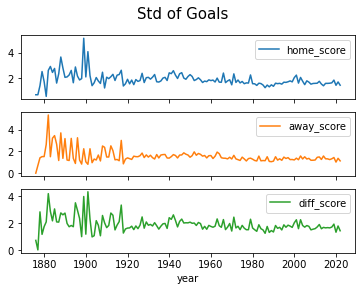

In [39]:
df.groupby('year').std().plot(y=['home_score','away_score','diff_score'],subplots=True)
plt.suptitle('Std of Goals',fontsize=15)

Standard deviation of goals scored has also been deceeasing over time

Text(0.5, 0.98, 'Month of the match played')

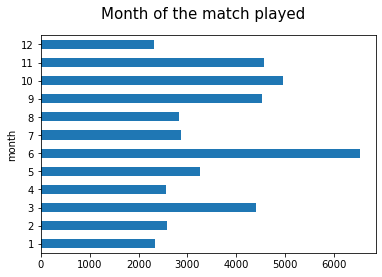

In [40]:
df.groupby(['month'])['home_team'].count().plot.barh()
plt.suptitle('Month of the match played',fontsize=15)

June is the most popular month, which makes sense as that is when most international tournaments are held (Euros, world cup). The rest of the year is mostly alloted to club soccer scheduling

Text(0.5, 0.98, '# of matches played by Year')

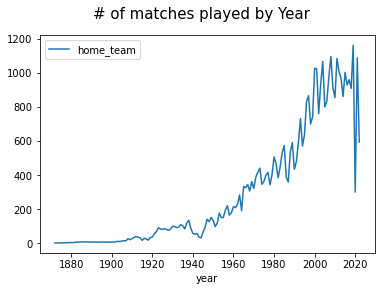

In [41]:
df.groupby('year').count().plot(y='home_team')
plt.suptitle('# of matches played by Year',fontsize=15)

Text(0, 0.5, '')

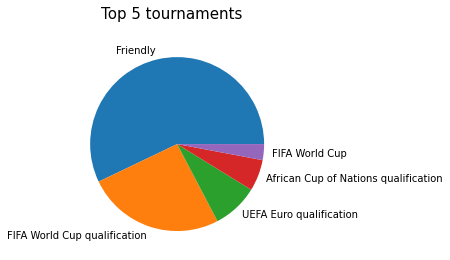

In [42]:
df.groupby('tournament')['home_team'].count().nlargest(5).plot.pie()
plt.suptitle('Top 5 tournaments',fontsize=15)
plt.ylabel('')

Friendlies form the largest share of matches played, followed by WC qualification

In [43]:
countrydf.head(2) #this is the country dataset which will be appended to df

,Unnamed: 0,Continent,Country
0,0,Africa,Algeria
1,1,Africa,Angola


In [44]:
testdf=pd.merge(df,countrydf,left_on='WinCountry',right_on='Country',how='left') #create a temp df called test df and do a left merge with left on and right on as the column names are different

In [45]:
testdf.drop('Unnamed: 0',axis=1,inplace=True) #drop unneeded colums

In [46]:
testdf.dropna(inplace=True) #drop NAs

In [47]:
testdf.rename(columns={'Continent':'WinContinent'},inplace=True) #rename columns

In [48]:
testdf.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry,year,month,diff_score,WinContinent,Country
1,England,Scotland,4,2,Friendly,London,England,False,H,England,Scotland,1873,3,2,Europe,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,England,1874,3,1,Europe,Scotland


In [49]:
newdf=pd.merge(testdf,countrydf,left_on='LoseCountry',right_on='Country',how='left') #create another temp dataset for the losing continent

In [50]:
newdf.rename(columns={'Continent':'LoseContinent'},inplace=True)

In [51]:
newdf.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry,year,month,diff_score,WinContinent,Country_x,Unnamed: 0,LoseContinent,Country_y
0,England,Scotland,4,2,Friendly,London,England,False,H,England,Scotland,1873,3,2,Europe,England,195.0,Europe,Scotland
1,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,England,1874,3,1,Europe,Scotland,194.0,Europe,England


In [52]:
intercontinental=newdf.loc[newdf['WinContinent']!=newdf['LoseContinent']] #create intercontinental in which win continent not equal to lose continent

In [53]:
intercontinental.dropna(inplace=True)

/var/folders/dv/wd_fn1ws4l18t7p_tt04f3d00000gn/T/ipykernel_9739/101272904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intercontinental.dropna(inplace=True)


In [54]:
intercontinental.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry,year,month,diff_score,WinContinent,Country_x,Unnamed: 0,LoseContinent,Country_y
53,Scotland,Canada,4,0,Friendly,Glasgow,Scotland,False,H,Scotland,Canada,1888,9,4,Europe,Scotland,149.0,North America,Canada
463,Canada,Scotland,0,1,Friendly,Montréal,Canada,False,A,Scotland,Canada,1921,7,1,Europe,Scotland,149.0,North America,Canada


### Intercontinental Matchups

In [55]:
intercontinental.groupby(['WinContinent','LoseContinent'])['home_team'].count()

WinContinent   LoseContinent
Africa         Asia             214
               Europe           138
               North America     34
               Oceania           23
               South America     20
Asia           Africa           220
               Europe           391
               North America     57
               Oceania           77
               South America     33
Europe         Africa           229
               Asia             645
               North America    195
               Oceania           50
               South America    259
North America  Africa            28
               Asia              40
               Europe            81
               Oceania           18
               South America    327
Oceania        Africa            20
               Asia             136
               Europe            22
               North America     14
               South America      7
South America  Africa            89
               Asia             115

This table excludes Draws, and only captures match ups accross different continents. 
Europe and South America are powerhouses. Europe has defeated South American teams 259 times, while South America has defeated Europe 343 Times

In [56]:
#another way to do this is using a pivot table
pd.pivot_table(intercontinental,index='WinContinent',columns='LoseContinent',values='year',aggfunc='count')

LoseContinent,Africa,Asia,Europe,North America,Oceania,South America
WinContinent,,,,,,
Africa,NaN,214.0,138.0,34.0,23.0,20.0
Asia,220.0,NaN,391.0,57.0,77.0,33.0
Europe,229.0,645.0,NaN,195.0,50.0,259.0
North America,28.0,40.0,81.0,NaN,18.0,327.0
Oceania,20.0,136.0,22.0,14.0,NaN,7.0
South America,89.0,115.0,343.0,422.0,34.0,NaN


In [57]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry,year,month,diff_score
date,,,,,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,D,D,1872,11,0
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,Scotland,1873,3,2


Or operator is used as |. Here is the. syntax for England being home OR away team, AND tournament is World Cup

In [58]:
df[((df['home_team']=='England') | (df['away_team']=='England')) & (df['tournament']=='FIFA World Cup')]

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,WinCountry,LoseCountry,year,month,diff_score
date,,,,,,,,,,,,,,
1950-06-25,Chile,England,0,2,FIFA World Cup,Rio de Janeiro,Brazil,True,A,England,Chile,1950,6,2
1950-06-29,England,United States,0,1,FIFA World Cup,Belo Horizonte,Brazil,True,A,United States,England,1950,6,1
1950-07-02,England,Spain,0,1,FIFA World Cup,Rio de Janeiro,Brazil,True,A,Spain,England,1950,7,1
1954-06-17,Belgium,England,4,4,FIFA World Cup,Basel,Switzerland,True,D,D,D,1954,6,0
1954-06-20,Switzerland,England,0,2,FIFA World Cup,Berne,Switzerland,False,A,England,Switzerland,1954,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True,A,Belgium,England,2018,6,1
2018-07-03,Colombia,England,1,1,FIFA World Cup,Moscow,Russia,True,D,D,D,2018,7,0
2018-07-07,Sweden,England,0,2,FIFA World Cup,Samara,Russia,True,A,England,Sweden,2018,7,2
